<a href="https://colab.research.google.com/github/snehanshastri/BIS/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generations: 14
Best Individual: [5, 7, 1, 3, 0, 6, 4, 2]
Fitness Score: 1.0


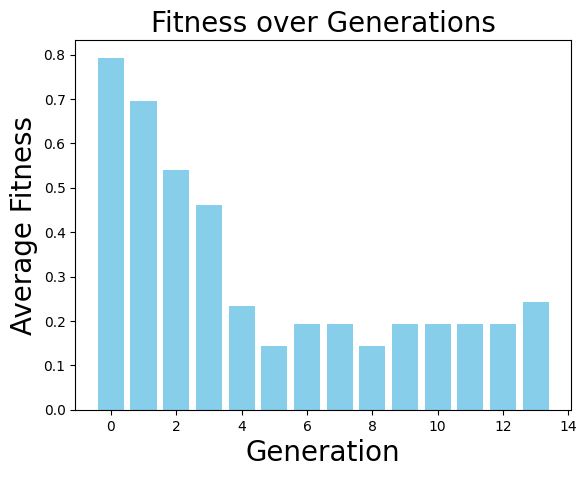

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

#create an individual

def create_individual():
    # Create a random chromosome
    return [random.randint(0, 7) for _ in range(8)]

#Generate Population

def generate_population(population_size=20):
    # Generate a population of individuals
    return [create_individual() for _ in range(population_size)]

#Parent selection

def parent_selection(population, fitnesses):
    # Select a parent based on fitness
    total_fitness = sum(fitnesses.values())
    pick = random.uniform(0, total_fitness)
    current = 0
    for individual, fitness in fitnesses.items():
        current += fitness
        if current > pick:
            return individual

#Next Generation Selection

def next_generation_selection(children_population):
    # Select the next generation from the children population
    sorted_population = sorted(children_population, key=lambda x: fitness_score(x), reverse=True)
    return sorted_population[:20]

#Crossover

def crossover(parents):
    # Perform crossover between two parents to create offspring
    point = random.randint(1, 7)
    child1 = parents[0][:point] + parents[1][point:]
    child2 = parents[1][:point] + parents[0][point:]
    return [child1, child2]

#Mutation

def mutate(individual, mutation_rate=0.1):
    # Mutate an individual with a given mutation rate
    if random.random() < mutation_rate:
        mutate_point = random.randint(0, 7)
        new_value = random.randint(0, 7)
        while new_value == individual[mutate_point]:
            new_value = random.randint(0, 7)
        individual[mutate_point] = new_value
    return individual

#Score Function

def fitness_score(individual):
    # Calculate fitness score of an individual
    non_attacking_pairs = 0
    total_pairs = 28  # 8 choose 2
    for i in range(len(individual)):
        for j in range(i + 1, len(individual)):
            if individual[i] != individual[j] and abs(individual[i] - individual[j]) != j - i:
                non_attacking_pairs += 1
    return non_attacking_pairs / total_pairs

#Calculate Population Fitness

def population_fitness(population):
    # Calculate the fitness of the entire population
    individuals_fitnesses = {}
    for chromosome in population:
        fitness_sc = fitness_score(chromosome)
        individuals_fitnesses[tuple(chromosome)] = fitness_sc
    total_fitness = sum(individuals_fitnesses.values())
    return individuals_fitnesses, total_fitness

#Termination Condition

def check_end(population):
    # Check if the termination condition is met
    for individual in population:
        if fitness_score(individual) == 1.0:
            return True
    return False

#Generate next generation

def generate_next_population(population, fitnesses):
    # Generate the next population
    new_population = []
    for _ in range(len(population)):
        parents = [list(parent_selection(population, fitnesses)) for _ in range(6)]
        for i in range(0, len(parents), 2):
            children = crossover(parents[i:i+2])
            new_population.extend([mutate(child) for child in children])
    return new_population

#Running the algorithm

generation = 0
fitness = []

population = generate_population()
individuals_fitnesses, total_fitness = population_fitness(population)

while not check_end(population):
    new_population = generate_next_population(population, individuals_fitnesses) # crossover and mutation
    population = next_generation_selection(new_population)
    individuals_fitnesses, total_fitness = population_fitness(population)

    generation += 1
    avg_fit = total_fitness / len(population)
    fitness.append(avg_fit)

print(f"Generations: {generation}")
best_individual = max(population, key=lambda x: fitness_score(x))
print(f"Best Individual: {best_individual}")
print(f"Fitness Score: {fitness_score(best_individual)}")

plt.bar(range(generation), fitness, color='skyblue')
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Average Fitness', fontsize=20)
plt.title('Fitness over Generations', fontsize=20)
plt.show()




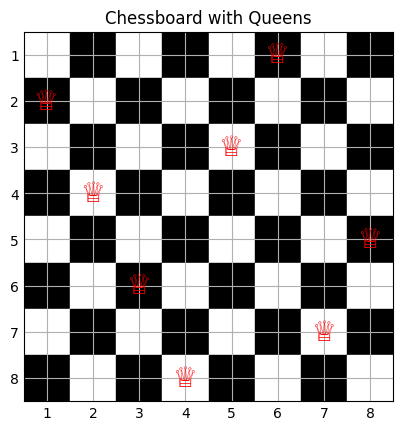

In [ ]:
def draw_chessboard(board):
    # Draw the chessboard with queens
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    for i in range(8):
        for j in range(8):
            color = 'white' if (i + j) % 2 == 0 else 'black'
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))

    for col, row in enumerate(board):
        ax.text(col + 0.5, row + 0.5, '♕', fontsize=20, ha='center', va='center', color='red')

    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_xticks(np.arange(0.5, 8.5, 1))
    ax.set_yticks(np.arange(0.5, 8.5, 1))
    ax.set_xticklabels(range(1, 9))
    ax.set_yticklabels(range(1, 9))
    ax.tick_params(axis='both', which='both', length=0)
    ax.grid(True)
    ax.invert_yaxis()
    plt.title('Chessboard with Queens')
    plt.show()

draw_chessboard(best_individual)

In [5]:
import numpy as np
import random

# Define the function to maximize
def objective_function(x):
    return x ** 2

# Generate an initial population
def initialize_population(pop_size, bounds):
    return [random.uniform(bounds[0], bounds[1]) for _ in range(pop_size)]

# Selection: Tournament selection - best individuals are selected as parent
def select_parents(population, scores):
    tournament_size = 3
    selected = random.sample(list(zip(population, scores)), tournament_size)
    selected.sort(key=lambda x: x[1], reverse=True)
    return selected[0][0], selected[1][0]

# Crossover: Single point crossover - weighted averaging
def crossover(parent1, parent2):
    alpha = random.random()
    child = alpha * parent1 + (1 - alpha) * parent2
    return child

# Mutation: Randomly perturb the child
def mutate(child, mutation_rate, bounds):
    if random.random() < mutation_rate:
        child += random.uniform(-1, 1)  # Random perturbation - adding a random value
        child = np.clip(child, bounds[0], bounds[1])  # Keep within bounds
    return child

# Genetic Algorithm
def genetic_algorithm(pop_size, bounds, mutation_rate, generations):
    # Initialize population
    population = initialize_population(pop_size, bounds)

    for generation in range(generations):
        scores = [objective_function(x) for x in population]
        next_generation = []

        # Create the next generation
        for _ in range(pop_size // 2):  # Create pairs of parents
            parent1, parent2 = select_parents(population, scores)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent1, parent2)

            # Mutate children
            child1 = mutate(child1, mutation_rate, bounds)
            child2 = mutate(child2, mutation_rate, bounds)

            next_generation.extend([child1, child2])

        population = next_generation

    # Get the best solution
    scores = [objective_function(x) for x in population]
    best_index = np.argmax(scores)
    best_solution = population[best_index]
    best_score = scores[best_index]

    return best_solution, best_score

# Parameters
population_size = 100
bounds = (-10, 10)  # Updated bounds
mutation_rate = 0.1 #indicates the number of mutations - exploration of space
generations = 200 #determines the number of iterations

# Run the Genetic Algorithm
best_solution, best_score = genetic_algorithm(population_size, bounds, mutation_rate, generations)
print(f"Best solution: x = {best_solution}, f(x) = {best_score}")


Best solution: x = 10.0, f(x) = 100.0
